In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
cleaned=pd.read_parquet("collated_crypto.parquet")

In [3]:
cleaned

,symbol,time,high,low,open,close
0,BTC,2023-04-17,30331.32,29265.91,30322.37,29446.34
1,BTC,2023-04-18,30485.26,29135.27,29446.34,30395.53
2,BTC,2023-04-19,30419.74,28615.79,30395.53,28821.91
3,BTC,2023-04-20,29094.98,28007.09,28821.91,28248.11
4,BTC,2023-04-21,28365.20,27173.44,28248.11,27261.17
...,...,...,...,...,...,...
1093,LTC,2024-04-12,99.51,80.31,98.75,86.16
1094,LTC,2024-04-13,86.60,70.87,86.16,77.50
1095,LTC,2024-04-14,80.44,73.93,77.50,79.82
1096,LTC,2024-04-15,82.87,75.70,79.82,78.11


In [4]:
new = cleaned[cleaned["symbol"] == "BTC"]

In [5]:
x_value=new["time"]
y_value=new["close"]

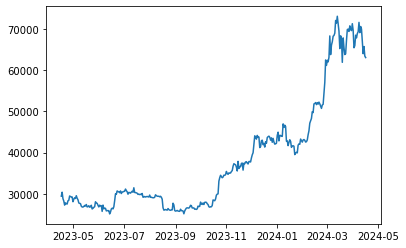

In [6]:
plot=pyplot.plot(x_value,y_value)

In [7]:
returns = np.log(y_value / y_value.shift(1))
returns = returns.fillna(0)

In [8]:
new["returns"]=returns

C:\Users\shupe\AppData\Local\Temp\ipykernel_12836\2739929621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["returns"]=returns


In [9]:
new["main_volatility"]=new["returns"].rolling(window=365,min_periods=1).std()*np.sqrt(365)

C:\Users\shupe\AppData\Local\Temp\ipykernel_12836\1288950371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["main_volatility"]=new["returns"].rolling(window=365,min_periods=1).std()*np.sqrt(365)


In [10]:
new["ewm_volatility"] = new["returns"].ewm(span=365).std()*np.sqrt(365)

C:\Users\shupe\AppData\Local\Temp\ipykernel_12836\717226156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["ewm_volatility"] = new["returns"].ewm(span=365).std()*np.sqrt(365)


In [11]:
new=new.fillna(0)

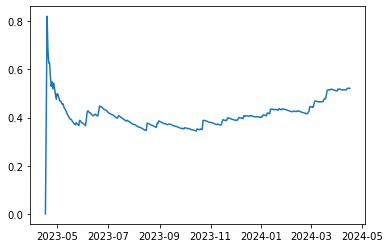

In [12]:
plot=pyplot.plot(x_value,new["ewm_volatility"])

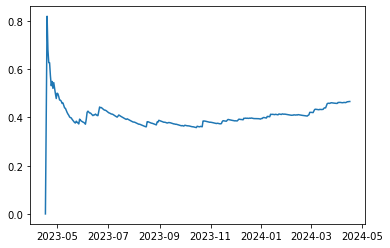

In [13]:
plot=pyplot.plot(x_value,new["main_volatility"])

In [14]:
new

,symbol,time,high,low,open,close,returns,main_volatility,ewm_volatility
0,BTC,2023-04-17,30331.32,29265.91,30322.37,29446.34,0.000000,0.000000,0.000000
1,BTC,2023-04-18,30485.26,29135.27,29446.34,30395.53,0.031726,0.428594,0.428594
2,BTC,2023-04-19,30419.74,28615.79,30395.53,28821.91,-0.053160,0.819440,0.820700
3,BTC,2023-04-20,29094.98,28007.09,28821.91,28248.11,-0.020109,0.680435,0.680435
4,BTC,2023-04-21,28365.20,27173.44,28248.11,27261.17,-0.035563,0.627311,0.626561
...,...,...,...,...,...,...,...,...,...
361,BTC,2024-04-12,71246.69,65257.57,70026.43,67158.30,-0.041820,0.462919,0.517104
362,BTC,2024-04-13,68422.60,61079.47,67158.30,64021.36,-0.047836,0.465002,0.521265
363,BTC,2024-04-14,65874.88,62229.80,64021.36,65765.64,0.026881,0.465022,0.520882
364,BTC,2024-04-15,66902.94,62328.07,65765.64,63447.27,-0.035888,0.465943,0.522586


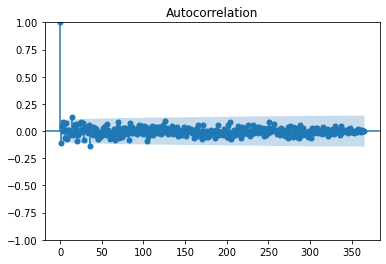

In [33]:
plot_acf(new["returns"],lags=365)
pyplot.show()

C:\Users\shupe\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


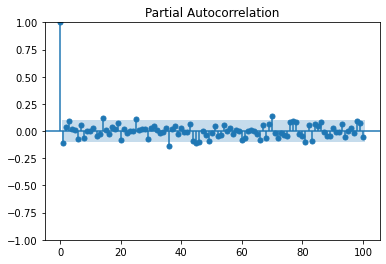

In [34]:
plot_pacf(new["returns"],lags=100)
pyplot.show()

In [36]:
squared_data = [x**2 for x in new["returns"]]
squared_array = np.array(squared_data)

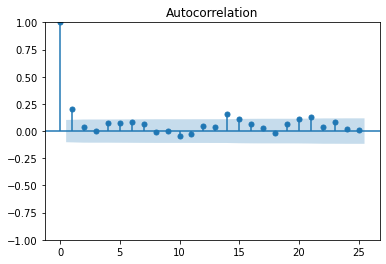

In [39]:
plot_acf(squared_array,lags=25)
pyplot.show()

In [22]:
n_test=round(len(squared_array)*.10)

In [40]:
train, test = new["returns"][:-n_test], new["returns"][-n_test:]

In [41]:
train

0      0.000000
1      0.031726
2     -0.053160
3     -0.020109
4     -0.035563
         ...   
324    0.035587
325    0.012215
326    0.019842
327    0.002588
328    0.008398
Name: returns, Length: 329, dtype: float64

In [42]:
test

329    0.043549
330   -0.009006
331    0.023085
332   -0.024241
333   -0.026546
334   -0.062901
335    0.046465
336   -0.011105
337   -0.087839
338    0.091499
339   -0.035460
340   -0.025927
341    0.002933
342    0.048845
343    0.039158
344    0.001401
345   -0.007972
346    0.019328
347   -0.012593
348   -0.003924
349    0.023882
350   -0.023073
351   -0.062461
352    0.007901
353    0.037737
354   -0.009726
355    0.015402
356    0.006415
357    0.032233
358   -0.035524
359    0.021453
360   -0.008562
361   -0.041820
362   -0.047836
363    0.026881
364   -0.035888
365   -0.005697
Name: returns, dtype: float64

In [52]:
model = arch_model(train, mean='Zero', vol='ARCH', p=6)

In [53]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 38194335.61945469
Iteration:      2,   Func. Count:     25,   Neg. LLF: 43580.93596727947
Iteration:      3,   Func. Count:     35,   Neg. LLF: -537.2837783473353
Iteration:      4,   Func. Count:     47,   Neg. LLF: 719.3055704824275
Iteration:      5,   Func. Count:     57,   Neg. LLF: -652.4897243921941
Iteration:      6,   Func. Count:     68,   Neg. LLF: 1882.08177758531
Iteration:      7,   Func. Count:     79,   Neg. LLF: -784.0677441670696
Iteration:      8,   Func. Count:     89,   Neg. LLF: -785.6079285177123
Iteration:      9,   Func. Count:     99,   Neg. LLF: -778.3379666817827
Iteration:     10,   Func. Count:    109,   Neg. LLF: -787.1217004275987
Iteration:     11,   Func. Count:    119,   Neg. LLF: -786.5291936761873
Iteration:     12,   Func. Count:    129,   Neg. LLF: -787.4532796540943
Iteration:     13,   Func. Count:    139,   Neg. LLF: -787.6989226374815
Iteration:     14,   Func. Count:    148,   Neg. LLF: -7

C:\Users\shupe\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005093. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [54]:
yhat = model_fit.forecast(horizon=n_test)

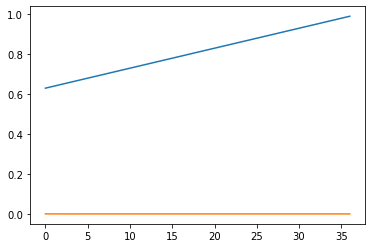

In [55]:
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()